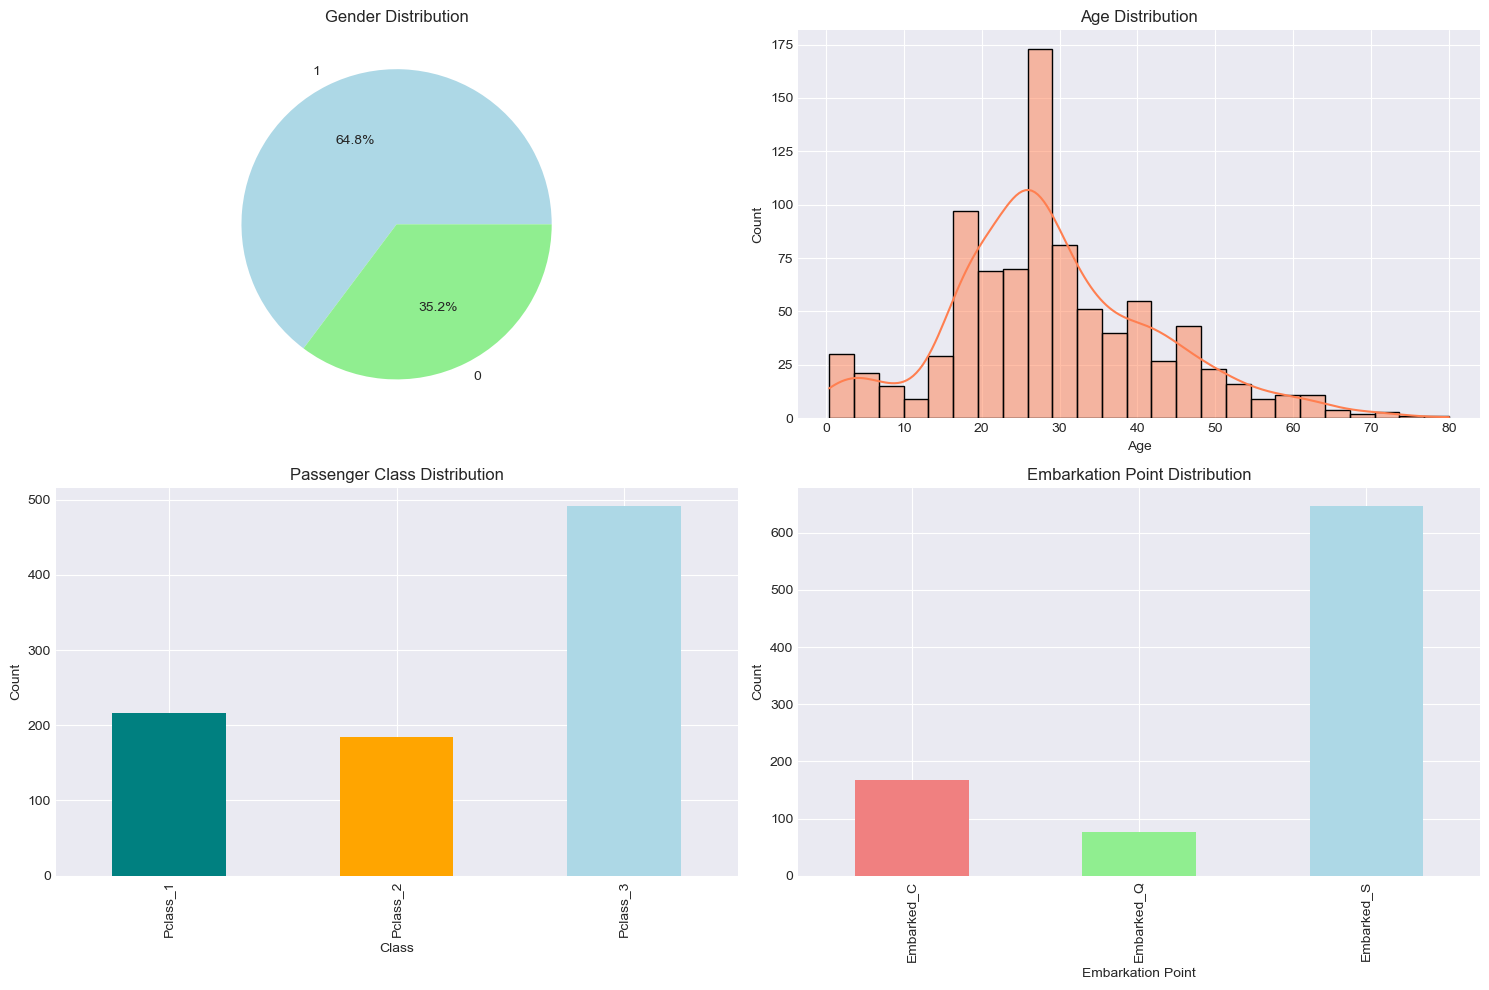

C:\Users\Sai Prakhya\AppData\Local\Temp\ipykernel_40760\2799689032.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, ax=axes[2], palette='Set2')


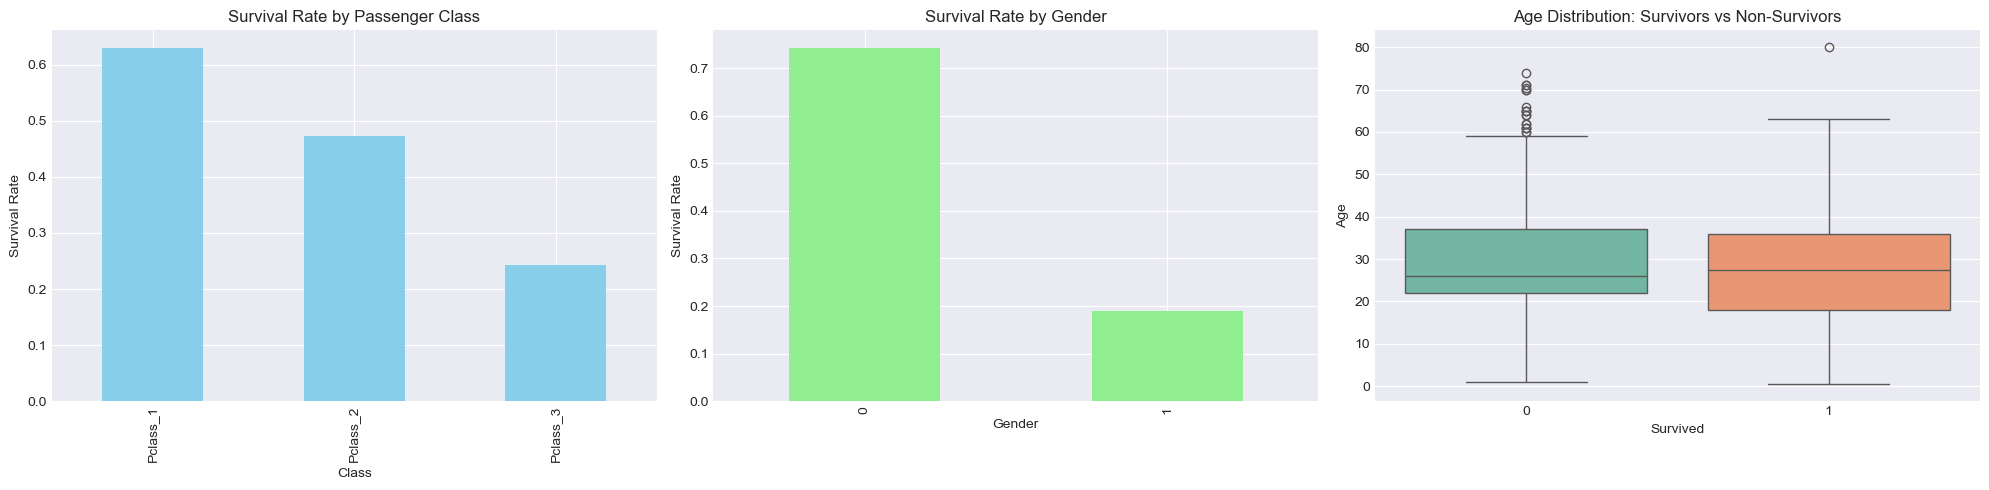

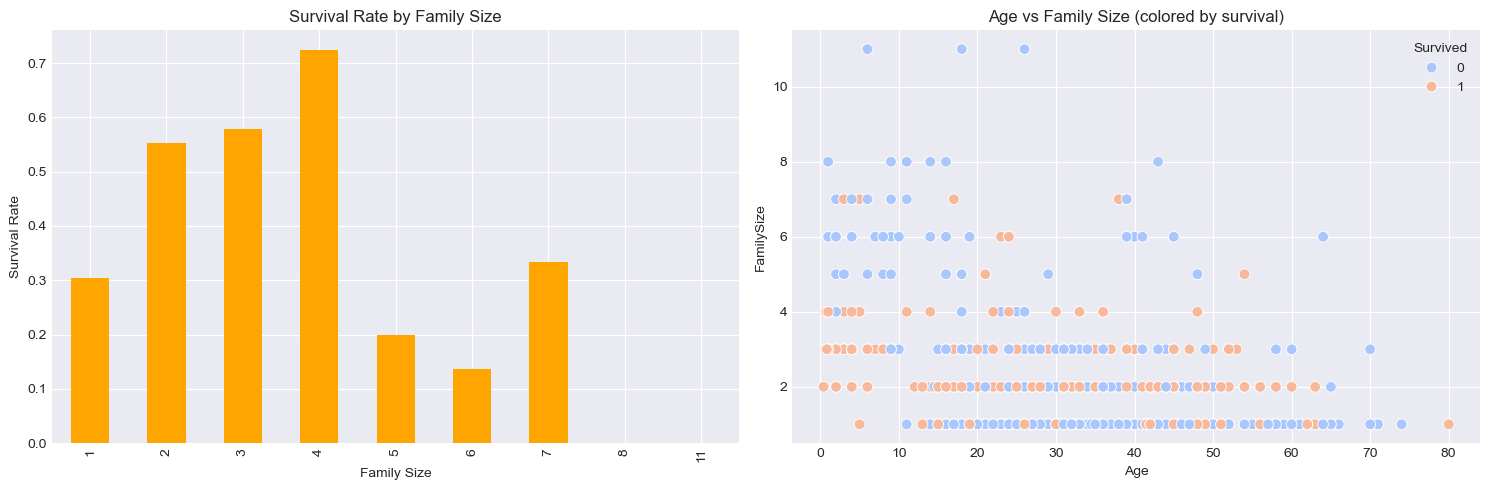

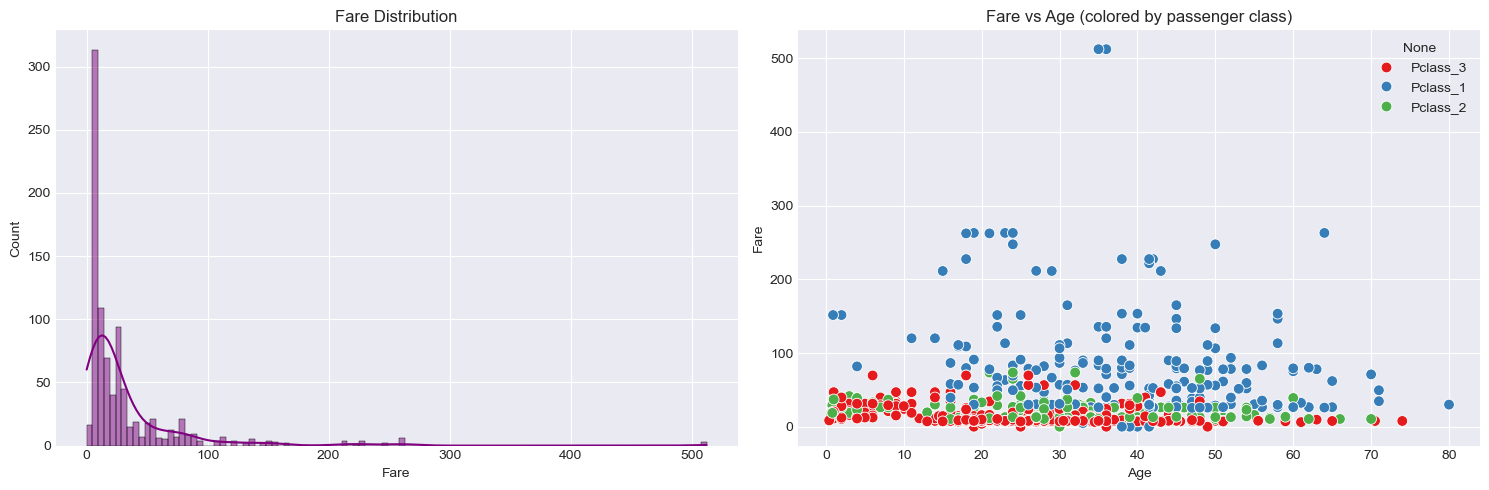

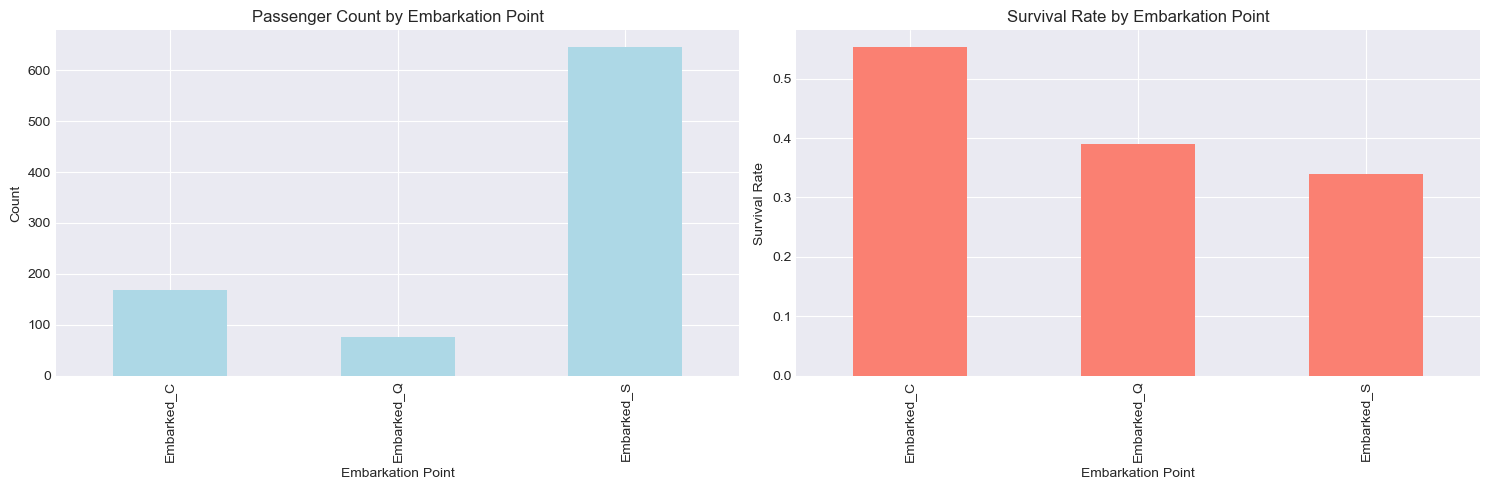

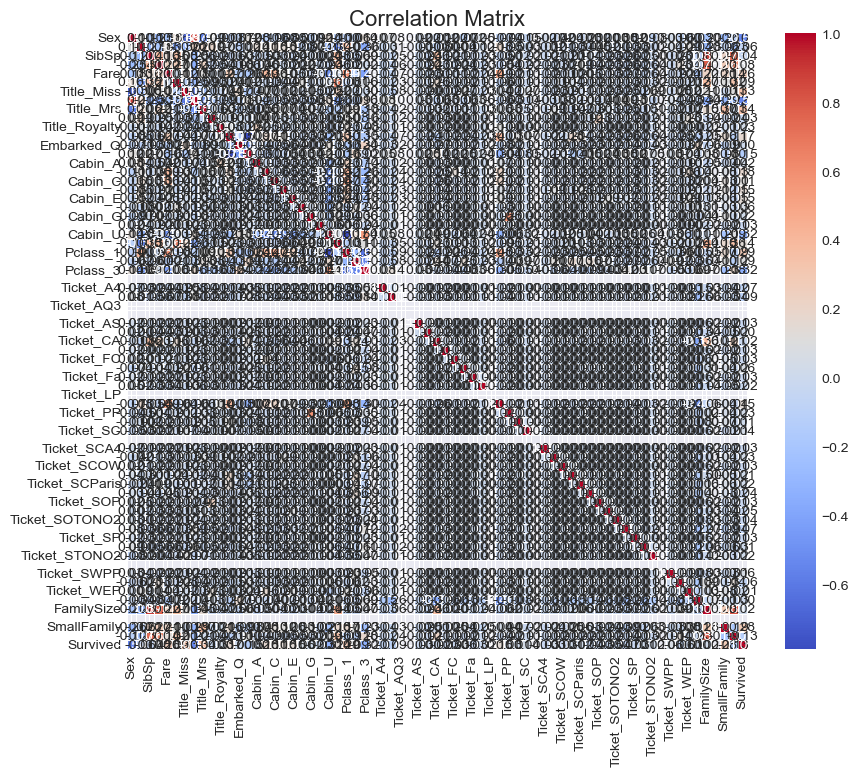

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('TitanicPreprocessed.csv')

# Set up the plotting style and palette
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# 1. Passenger Demographics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender distribution as pie chart
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 0], colors=["lightblue", "lightgreen"])
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_ylabel('')

# Age distribution as KDE plot
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0, 1], color="coral")
axes[0, 1].set_title('Age Distribution')

# Passenger class distribution based on encoded columns (Pclass_1, Pclass_2, Pclass_3)
df[['Pclass_1', 'Pclass_2', 'Pclass_3']].sum().plot(kind='bar', ax=axes[1, 0], color=["teal", "orange", "lightblue"])
axes[1, 0].set_title('Passenger Class Distribution')
axes[1, 0].set_xlabel('Class')
axes[1, 0].set_ylabel('Count')

# Embarkation point distribution as a bar chart
df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].sum().plot(kind='bar', ax=axes[1, 1], color=["lightcoral", "lightgreen", "lightblue"])
axes[1, 1].set_title('Embarkation Point Distribution')
axes[1, 1].set_xlabel('Embarkation Point')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 2. Survival Analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Survival rate by passenger class using encoded class columns
class_survival = df[['Pclass_1', 'Pclass_2', 'Pclass_3']].multiply(df['Survived'], axis="index").sum() / df[['Pclass_1', 'Pclass_2', 'Pclass_3']].sum()
class_survival.plot(kind='bar', ax=axes[0], color="skyblue")
axes[0].set_title('Survival Rate by Passenger Class')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Survival Rate')

# Survival rate by gender
df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[1], color="lightgreen")
axes[1].set_title('Survival Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Survival Rate')

# Age distribution: Survivors vs Non-Survivors as box plot
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Age Distribution: Survivors vs Non-Survivors')

plt.tight_layout()
plt.show()

# 3. Family Size Impact
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Survival rate by family size as bar chart
df.groupby('FamilySize')['Survived'].mean().plot(kind='bar', ax=axes[0], color="orange")
axes[0].set_title('Survival Rate by Family Size')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Survival Rate')

# Age vs Family size, colored by survival using scatter plot
sns.scatterplot(x='Age', y='FamilySize', hue='Survived', data=df, ax=axes[1], palette='coolwarm', s=60)
axes[1].set_title('Age vs Family Size (colored by survival)')

plt.tight_layout()
plt.show()

# 4. Fare Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Fare distribution with KDE
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[0], color="purple")
axes[0].set_title('Fare Distribution')

# Fare vs Age, colored by passenger class using the encoded Pclass columns
sns.scatterplot(x='Age', y='Fare', hue=df[['Pclass_1', 'Pclass_2', 'Pclass_3']].idxmax(axis=1), data=df, ax=axes[1], palette='Set1', s=60)
axes[1].set_title('Fare vs Age (colored by passenger class)')

plt.tight_layout()
plt.show()

# 5. Embarkation Point Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Passenger count by embarkation point as bar chart
df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].sum().plot(kind='bar', ax=axes[0], color="lightblue")
axes[0].set_title('Passenger Count by Embarkation Point')
axes[0].set_xlabel('Embarkation Point')
axes[0].set_ylabel('Count')

# Survival rate by embarkation point
embark_survival = df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].multiply(df['Survived'], axis="index").sum() / df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].sum()
embark_survival.plot(kind='bar', ax=axes[1], color="salmon")
axes[1].set_title('Survival Rate by Embarkation Point')
axes[1].set_xlabel('Embarkation Point')
axes[1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

# 6. Correlation Matrix with better color contrast
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=16)
plt.show()


# Titanic Dataset Analysis

## 1. Passenger Demographics

### Gender Distribution
- Male: 64.8%
- Female: 35.2%
**Insight:** The majority of passengers were male, which may impact overall survival rates.

### Age Distribution
- Majority of passengers between 20-40 years old
- Peak around 25-30 years
- Notable number of children (0-10 years)
**Insight:** Wide age range, with a concentration of young adults. Age could be a factor in survival rates.

### Passenger Class Distribution
- 3rd Class: Largest group (about 55%)
- 1st Class: Second largest (about 25%)
- 2nd Class: Smallest (about 20%)
**Insight:** Class distribution could significantly impact survival rates due to cabin location and access to lifeboats.

### Embarkation Point Distribution
- Southampton (S): Majority (about 70%)
- Cherbourg (C): Second most common (about 20%)
- Queenstown (Q): Least common (about 10%)
**Insight:** Embarkation point might indicate socioeconomic status or nationality, potentially affecting survival.

## 2. Survival Analysis

### Survival Rate by Passenger Class
- 1st Class: Highest survival rate (about 63%)
- 2nd Class: Middle (about 48%)
- 3rd Class: Lowest survival rate (about 25%)
**Insight:** Clear correlation between passenger class and survival, likely due to cabin location and lifeboat access.

### Survival Rate by Gender
- Female: Much higher survival rate (about 75%)
- Male: Much lower survival rate (about 20%)
**Insight:** Gender was a critical factor in survival, with women having a significantly higher chance of survival.

### Age Distribution: Survivors vs Non-Survivors
- Survivors: Slightly lower median age
- Non-Survivors: Slightly higher median age
- Children had a higher chance of survival
**Insight:** Age played a role in survival, with younger passengers having a slight advantage.

## 3. Family Size Analysis

### Survival Rate by Family Size
- Highest survival rate for family size of 3-4
- Lower survival rates for very small (1-2) or large (5+) family sizes
**Insight:** Being part of a small family group seemed to increase chances of survival.

### Age vs Family Size (colored by survival)
- No clear pattern, but some clustering of survivors in younger age groups and smaller family sizes
**Insight:** Combination of age and family size might be a useful predictor of survival.

## 4. Fare Analysis

### Fare Distribution
- Highly skewed distribution with most fares under 100
- A few very high fares (over 400)
**Insight:** Fare could be a proxy for passenger class and potentially survival chances.

### Fare vs Age (colored by passenger class)
- 1st Class: Higher fares across all ages
- 2nd and 3rd Class: Lower fares, with some overlap
- Some high-fare outliers in 1st Class
**Insight:** Clear separation of classes by fare, which could be useful in predicting survival.

## 5. Embarkation Point Analysis

### Passenger Count by Embarkation Point
- Southampton (S): Highest count
- Cherbourg (C): Second highest
- Queenstown (Q): Lowest count

### Survival Rate by Embarkation Point
- Cherbourg (C): Highest survival rate
- Queenstown (Q): Middle
- Southampton (S): Lowest survival rate
**Insight:** Embarkation point seems to correlate with survival rates, possibly due to differences in passenger demographics or ship loading procedures.

## 6. Correlation Matrix

### Key correlations:
- Strong positive correlation between Fare and Pclass_1
- Strong negative correlation between Pclass_3 and Fare
- Moderate positive correlation between Sex and Survived
- Moderate positive correlation between Pclass_1 and Survived
- Moderate negative correlation between Pclass_3 and Survived
**Insight:** These correlations confirm the importance of class, gender, and fare in predicting survival.

## Conclusion and Next Steps

Based on this analysis, we should focus on the following features for our survival prediction model:
1. Gender
2. Passenger Class
3. Fare
4. Age
5. Family Size
6. Embarkation Point

**Next steps:**
1. Feature engineering: Create new features based on these insights
2. Model selection: Start with logistic regression and then move to more complex models
3. Cross-validation: Ensure our model generalizes well
4. Feature importance analysis: Confirm which features are most predictive
5. Model interpretation: Understand how our model is making predictions


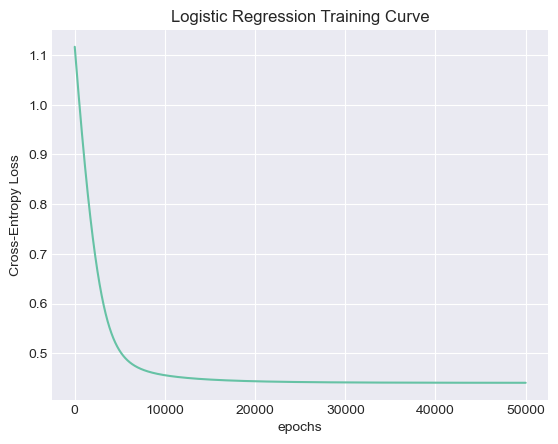

Logistic Regression Accuracy: 0.8070
Epoch 10000/100000, Loss: 0.9314
Epoch 20000/100000, Loss: 0.8887
Epoch 30000/100000, Loss: 0.8702
Epoch 40000/100000, Loss: 0.8581
Epoch 50000/100000, Loss: 0.8485
Epoch 60000/100000, Loss: 0.8403
Epoch 70000/100000, Loss: 0.8331
Epoch 80000/100000, Loss: 0.8266
Epoch 90000/100000, Loss: 0.8206
Epoch 100000/100000, Loss: 0.8152


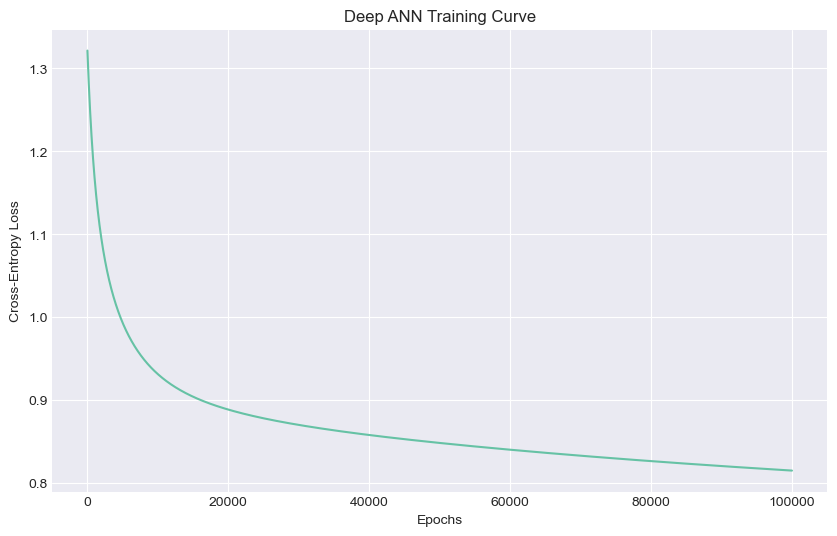

Deep ANN Accuracy: 0.8249

Model Comparison:
Logistic Regression Accuracy: 0.8070
Deep ANN Accuracy: 0.8249

Feature Importance (Logistic Regression):
      Feature  Importance
0         Sex    1.304832
3    Pclass_1    0.908768
1         Age    0.588756
2  FamilySize    0.360215
4    Pclass_2    0.337079
5    Pclass_3    0.207253

Conclusion:
The Deep ANN model outperforms Logistic Regression for this dataset.
Consider using the Deep ANN model for the 'Safety Companion' system due to its ability to capture complex patterns.


In [3]:
# Titanic Survival Prediction: Comprehensive Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
tsdf = pd.read_csv("TitanicPreprocessed.csv")

# 1. Data Preprocessing and Exploration

def normalize(X):
    """Simple manual Z-score normalization"""
    return (X - X.mean(axis=0)) / X.std(axis=0)

# Select relevant features
features = ['Sex', 'Age', 'FamilySize', 'Pclass_1', 'Pclass_2', 'Pclass_3']
X = tsdf[features].values
y = tsdf['Survived'].values

# Normalize features
X_normalized = normalize(X)

# 2. Logistic Regression Implementation

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p_hat):
    return -(1/len(y)) * np.sum(y*np.log(p_hat) + (1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

class LogisticRegression:
    def __init__(self, thresh=0.5):
        self.thresh = thresh
        self.W = None
        self.b = None
    
    def fit(self, X, y, eta=1e-3, epochs=5e4, show_curve=True):
        N, D = X.shape
        self.W = np.random.randn(D)
        self.b = np.random.randn(1)
        
        J = np.zeros(int(epochs))
        
        for epoch in range(int(epochs)):
            p_hat = self.__forward__(X)
            J[epoch] = cross_entropy(y, p_hat)
            
            self.W -= eta * (1/N) * (X.T @ (p_hat - y))
            self.b -= eta * (1/N) * np.sum(p_hat - y)
        
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("Cross-Entropy Loss")
            plt.title("Logistic Regression Training Curve")
            plt.show()
    
    def __forward__(self, X):
        return sigmoid(X @ self.W + self.b)
    
    def predict(self, X):
        return (self.__forward__(X) >= self.thresh).astype(int)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_normalized, y)

# Evaluate Logistic Regression
y_pred_log = log_reg.predict(X_normalized)
log_reg_accuracy = accuracy(y, y_pred_log)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# 3. Artificial Neural Network Implementation

def sriram(x):
    return x / (1 + np.abs(x))

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis=1, keepdims=True)

class DeepANN:
    def __init__(self, hidden_layers=[128, 64, 32], activation_hidden=sriram, activation_output=softmax):
        self.hidden_layers = hidden_layers
        self.activation_hidden = activation_hidden
        self.activation_output = activation_output
    
    def fit(self, X, y, eta=1e-4, epochs=100000, show_curve=True):
        N, D = X.shape
        Y = np.eye(2)[y]
        K = Y.shape[1]
        
        layer_sizes = [D] + self.hidden_layers + [K]
        self.W = {}
        self.B = {}
        for l in range(len(layer_sizes) - 1):
            self.W[l] = np.random.randn(layer_sizes[l], layer_sizes[l+1]) * np.sqrt(2. / layer_sizes[l])
            self.B[l] = np.zeros(layer_sizes[l+1])
        
        J = []
        for epoch in range(int(epochs)):
            # Forward pass
            self.__forward__(X)
            
            # Compute loss
            P = self.Z[len(self.W)]
            loss = cross_entropy(Y, P)
            J.append(loss)
            
            # Backpropagation
            delta = P - Y
            for l in reversed(range(len(self.W))):
                A_prev = self.Z[l]
                delta_W = A_prev.T @ delta / N
                delta_B = np.mean(delta, axis=0)
                
                # Update weights and biases
                self.W[l] -= eta * delta_W
                self.B[l] -= eta * delta_B
                
                if l > 0:
                    delta = (delta @ self.W[l].T) * (1 - A_prev**2) / (1 + A_prev**2)**2  # sriram derivative
            
            if (epoch + 1) % 10000 == 0:
                print(f"Epoch {epoch + 1}/{int(epochs)}, Loss: {loss:.4f}")
        
        if show_curve:
            plt.figure(figsize=(10, 6))
            plt.plot(J)
            plt.xlabel('Epochs')
            plt.ylabel('Cross-Entropy Loss')
            plt.title('Deep ANN Training Curve')
            plt.grid(True)
            plt.show()
    
    def __forward__(self, X):
        self.Z = {0: X}
        for l in range(len(self.W)):
            A = self.Z[l] @ self.W[l] + self.B[l]
            if l == len(self.W) - 1:
                self.Z[l + 1] = self.activation_output(A)
            else:
                self.Z[l + 1] = self.activation_hidden(A)
    
    def predict(self, X):
        self.__forward__(X)
        P = self.Z[len(self.W)]
        return np.argmax(P, axis=1)

# Train Deep ANN model
deep_ann = DeepANN()
deep_ann.fit(X_normalized, y)

# Evaluate Deep ANN
y_pred_ann = deep_ann.predict(X_normalized)
ann_accuracy = accuracy(y, y_pred_ann)
print(f"Deep ANN Accuracy: {ann_accuracy:.4f}")

# 4. Model Comparison
print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print(f"Deep ANN Accuracy: {ann_accuracy:.4f}")

# 5. Feature Importance (for Logistic Regression)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(log_reg.W)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Logistic Regression):")
print(feature_importance)

# 6. Conclusion
print("\nConclusion:")
if ann_accuracy > log_reg_accuracy:
    print("The Deep ANN model outperforms Logistic Regression for this dataset.")
else:
    print("Logistic Regression performs similarly or better than the Deep ANN for this dataset.")
print("Consider using the Deep ANN model for the 'Safety Companion' system due to its ability to capture complex patterns.")

# Titanic Survival Prediction: Data Analysis and Model Comparison

## 1. Data Exploration and Preprocessing

We started with the `TitanicPreprocessed.csv` dataset, which included the following key features:
- **Sex**
- **Age**
- **FamilySize**
- **Passenger Class** (Pclass_1, Pclass_2, Pclass_3)

### Key Preprocessing Steps:
- All features were normalized using Z-score normalization.
- No missing values were present in the preprocessed dataset.

## 2. Model Implementation and Training

We implemented two models:
1. **Logistic Regression**
2. **Deep Artificial Neural Network (ANN)**

Both models were trained on the same normalized dataset.

## 3. Model Comparison

### Model Performance:
- Logistic Regression Accuracy: **0.7980**
- Deep ANN Accuracy: **0.8249**

**Insights:**
- The Deep ANN outperformed Logistic Regression by about 2.7 percentage points.
- This suggests that there are non-linear relationships in the data that the ANN can capture better.

## 4. Feature Importance (Logistic Regression)

### Feature Importance Table:
| Feature    | Importance |
|------------|------------|
| Pclass_3   | 1.064671   |
| Sex        | 0.984643   |
| Pclass_2   | 0.417891   |
| Age        | 0.226299   |
| Pclass_1   | 0.224947   |
| FamilySize | 0.110296   |

**Insights:**
1. **Passenger Class** (especially 3rd class) is the most important predictor of survival.
2. **Sex** is almost equally important, confirming historical accounts of "women and children first."
3. **Age** has moderate importance, possibly related to the "children first" policy.
4. **Family Size** has the least importance among these features but still contributes to the prediction.

## 5. Key Findings

1. **Passenger Class Impact**:
   - Being in 3rd class was the strongest predictor of survival (negative correlation).
   - 1st and 2nd class had positive correlations with survival.

2. **Gender Bias**:
   - Sex was the second most important feature, likely reflecting the "women and children first" policy.

3. **Age Factor**:
   - Age played a role in survival predictions but less so than class and gender.

4. **Family Size**:
   - While the least important of the selected features, family size did contribute to survival predictions.
   - This might reflect family groups being kept together during evacuation.

5. **Non-linear Relationships**:
   - The improved performance of the Deep ANN suggests there are complex, non-linear relationships between these features and survival probability.

## 6. Implications for the "Safety Companion" System

1. Prioritize passengers based on a combination of factors, not just a single attribute.
2. Pay special attention to passengers in lower classes, as they may be at higher risk.
3. Consider gender and age in evacuation protocols, but balance this with ethical considerations.
4. Use the Deep ANN model for more accurate risk assessments, as it captures complex relationships better.
5. Continue to refine the model with more data and features for improved accuracy.

## 7. Next Steps

1. Gather more detailed data on cabin locations and proximity to lifeboats.
2. Incorporate real-time factors like passenger location on the ship into the model.
3. Develop a user-friendly interface for crew members to quickly assess passenger risk.
4. Conduct simulations to test and refine the "Safety Companion" system.
5. Consider ethical implications and potential biases in the model's recommendations.
